Importing Data

Data Cleaning

    Handle missing values: Impute or remove missing data.
    Remove duplicates: Ensure there are no duplicate records.
    Correct data types: Convert data types to appropriate formats.
    Fix errors: Address any inconsistencies or errors in the data.

In [12]:
import sys
import os

# Go up one level to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
print("Project root:", project_root)

# Add project root to Python path
if project_root not in sys.path:
    sys.path.append(project_root)

# # Auto-reload modules when they're changed
%load_ext autoreload
%autoreload 2

Project root: /home/hamid/Desktop/kaim5/Kaim5-Week1-challenge
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# from my_module import load_all_yfinance_data and load_news_data
from src.my_module import load_yfinance_data,load_news_data


In [15]:
#define path for loading the data
news_data_file_path='../Data/Raw/raw_analyst_ratings.csv' 
financial_data_file_path='../Data/Raw/yfinance_data/'  

In [16]:
financial_df=load_yfinance_data(financial_data_file_path)
news_df=pd.read_csv(news_data_file_path)
#load_news_data(news_data_file_path)

In [17]:
financial_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45428 entries, 0 to 45427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          45428 non-null  object 
 1   Open          45428 non-null  float64
 2   High          45428 non-null  float64
 3   Low           45428 non-null  float64
 4   Close         45428 non-null  float64
 5   Adj Close     45428 non-null  float64
 6   Volume        45428 non-null  int64  
 7   Dividends     45428 non-null  float64
 8   Stock Splits  45428 non-null  float64
 9   Ticker        45428 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 3.5+ MB


In [18]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [19]:
#overview of the news data

news_df['headline']

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

In [22]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
# Apply sentiment analysis to the 'headline' column
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

In [23]:
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


Sentiment analysis completed. Sample data:
                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday        0.0
1         Stocks That Hit 52-Week Highs On Wednesday        0.0
2                      71 Biggest Movers From Friday        0.0
3       46 Stocks Moving In Friday's Mid-Day Session        0.0
4  B of A Securities Maintains Neutral on Agilent...        0.0


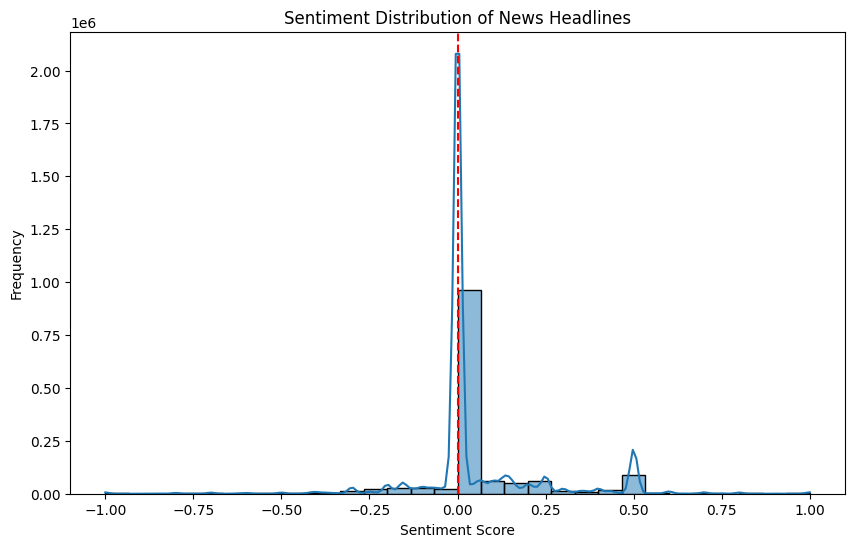

In [24]:
print("Sentiment analysis completed. Sample data:")
print(news_df[['headline', 'sentiment']].head())
# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(news_df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of News Headlines')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', label='Neutral Sentiment')


In [34]:
#calculate sentiment scores for the headlines
most_negative_sentiment=news_df.nsmallest(15,'sentiment')
most_positive_sentiment=news_df.nlargest(15, 'sentiment')
print("Most Negative Sentiment Headlines:")
print(most_negative_sentiment[['headline', 'sentiment', 'stock']])
print("\nMost Positive Sentiment Headlines:")
print(most_positive_sentiment[['headline', 'sentiment', 'stock']])


Most Negative Sentiment Headlines:
                                               headline  sentiment stock
2552  Tech, Semiconductors Among Worst Performers As...       -1.0    AA
3175               I've just made a horrible investment       -1.0    AA
5658   Worst Performing Industries For October 13, 2016       -1.0  AAOI
5710   Worst Performing Industries For December 2, 2014       -1.0  AAOI
6100                            10 Worst Stocks Of 2017       -1.0   AAP
6243  Worst Performing Industries For September 29, ...       -1.0   AAP
6282        Worst Performing Industries For May 5, 2016       -1.0   AAP
6312  Worst Performing Industries For November 12, 2015       -1.0   AAP
6354  Worst Performing Industries For February 12, 2015       -1.0   AAP
6390      Worst Performing Industries For July 22, 2014       -1.0   AAP
6412  Worst Performing Industries For December 26, 2013       -1.0   AAP
6617  Benzinga's Worst Performing Industries (PBY, A...       -1.0   AAP
7091  Selling Pi

In [61]:
#checking for unique sentiment values
unique_sentiments = news_df['sentiment'].nunique()
print(f"Number of unique sentiment values: {unique_sentiments}")
# Check for missing values in the sentiment column
missing_sentiment = news_df['sentiment'].isnull().sum()
print(f"Number of missing sentiment values: {missing_sentiment}")
print(news_df['sentiment'].describe())  

Number of unique sentiment values: 5133
Number of missing sentiment values: 0
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


In [77]:
#Obtain basic statistics for textual lengths (like headline length).
news_df['headline_length'] = news_df['headline'].str.len()
news_df['headline_word_count'] = news_df['headline'].str.split().apply(len)

# Display basic statistics for headline lengths
headline_length_stats = news_df['headline_length'].head()
print("Headline Length Statistics:")
print(headline_length_stats)

# Display basic statistics for headline word counts
headline_word_count_stats = news_df['headline_word_count'].head()
print("Headline Word Count Statistics:")
print(headline_word_count_stats)

publisher_counts = news_df['publisher'].value_counts()
print("Publisher Counts:")
print(publisher_counts)


Headline Length Statistics:
0    39
1    42
2    29
3    44
4    87
Name: headline_length, dtype: int64
Headline Word Count Statistics:
0     7
1     7
2     5
3     7
4    14
Name: headline_word_count, dtype: int64
Publisher Counts:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [ ]:
# Use pandas to_datetime with errors='coerce' to handle inconsistent formats
news_df['date'].isnull().count()  
news_df['date'].isnull().count()  

# Convert 'date' column to datetime format

np.int64(1407328)